# Reading data from file using scipy

In [24]:
import scipy as sp

data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")

In [25]:
print(data[:10])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


Getting share information i.e., number of row and columns

In [26]:
print(data.shape)

(743, 2)


# Processing and Cleaning data

Split two coloumns to seperate two vectors

In [27]:
x = data[:, 0]
y = data[:, 1]

Check how many rows contain invalid data nan

In [28]:
sp.sum(sp.isnan(y))

8

Remove invalid rows

In [29]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [30]:
sp.sum(sp.isnan(y))

0

# Visualize data using matplotlib

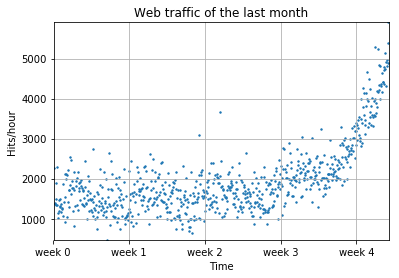

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s=2)
plt.title("Web traffic of the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w * 7 * 24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

# Start Designing the model
## Starting with a stright line

In [38]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [33]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full = True)

In [34]:
print("Model parameters: %s" % fp1)

Model parameters: [   2.59619213  989.02487106]


In [35]:
print(residuals)

[  3.17389767e+08]


In [39]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.34


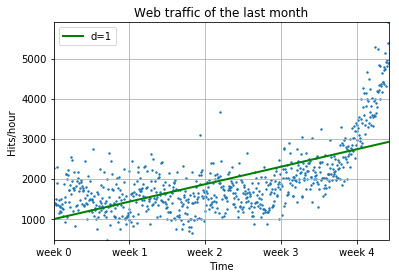

In [52]:
fx = sp.linspace(0, x[-1], 1000)
plt.scatter(x, y, s=2)
plt.title("Web traffic of the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w * 7 * 24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.plot(fx, f1(fx), linewidth=2, color="green")
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

## Try with polynomial of order 2

In [54]:
fp2 = sp.polyfit(x, y, 2)
print(fp2)

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


In [56]:
f2 = sp.poly1d(fp2)
print(error(f2, x, y))
print(error(f1, x, y))

179983507.878
317389767.34


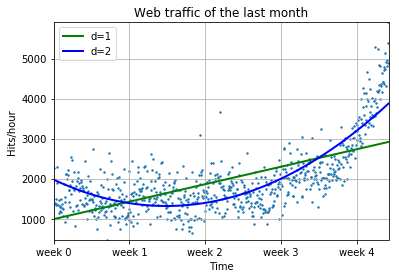

In [59]:
fx = sp.linspace(0, x[-1], 1000)
plt.scatter(x, y, s=2)
plt.title("Web traffic of the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w * 7 * 24 for w in range(10)], ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.plot(fx, f1(fx), linewidth=2, color="green")
plt.plot(fx, f2(fx), linewidth=2, color="blue")
plt.legend(["d=%i" % f1.order, "d=%i" % f2.order], loc="upper left")
plt.show()